In [93]:
import pandas_datareader.data as web
from datetime import datetime
import matplotlib
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report

start = datetime(2000, 01,01)
end = datetime(2016,07,31)

In [136]:
spy = web.DataReader('SPY', 'yahoo',start, end)

In [38]:
goog = web.DataReader('GOOG', 'yahoo', start, end)

In [50]:
face = web.DataReader('FB', 'yahoo', start, end)

In [137]:
spy.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,148.250000,148.250000,143.875000,145.4375,8164300,106.986789
2000-01-04,143.531204,144.062500,139.640594,139.7500,8089800,102.802948
2000-01-05,139.937500,141.531204,137.250000,140.0000,12177900,102.986853
2000-01-06,139.625000,141.500000,137.750000,137.7500,6227200,101.331707
2000-01-07,140.312500,145.750000,140.062500,145.7500,8066500,107.216670


In [169]:
spy['T-1 Adj Close'] = spy['Adj Close'].shift(1)
spy['T-2 Adj Close'] = spy['Adj Close'].shift(2)
spy['T-3 Adj Close'] = spy['Adj Close'].shift(3)
spy['T+1 Close'] = spy['Adj Close'].shift(-1)
spy['T+1 Result'] = spy['T+1 Close'] > spy['Adj Close']

In [139]:
spy.tail()

,Open,High,Low,Close,Volume,Adj Close,T-1 Adj Close,T-2 Adj Close,T-3 Adj Close,T+1 Close,T+1 Result
Date,,,,,,,,,,,
2016-07-25,217.000000,217.059998,215.970001,216.649994,55873100,216.649994,217.240005,216.270004,217.089996,216.750000,True
2016-07-26,216.529999,217.169998,215.759995,216.750000,70080500,216.750000,216.649994,217.240005,216.270004,216.520004,False
2016-07-27,217.190002,217.270004,215.619995,216.520004,84083900,216.520004,216.750000,216.649994,217.240005,216.770004,True
2016-07-28,216.289993,217.110001,215.750000,216.770004,65035700,216.770004,216.520004,216.750000,216.649994,217.119995,True
2016-07-29,216.460007,217.539993,216.130005,217.119995,77757800,217.119995,216.770004,216.520004,216.750000,NaN,False


In [155]:
train = spy[datetime(2000,01,03):datetime(2015,12,31)]

In [156]:
test = spy[datetime(2016,01,01):]

In [157]:
train.columns

Index([u'Open', u'High', u'Low', u'Close', u'Volume', u'Adj Close',
       u'T-1 Adj Close', u'T-2 Adj Close', u'T-3 Adj Close', u'T+1 Close',
       u'T+1 Result'],
      dtype='object')

In [158]:
train.head()

,Open,High,Low,Close,Volume,Adj Close,T-1 Adj Close,T-2 Adj Close,T-3 Adj Close,T+1 Close,T+1 Result
Date,,,,,,,,,,,
2000-01-03,148.250000,148.250000,143.875000,145.4375,8164300,106.986789,NaN,NaN,NaN,102.802948,False
2000-01-04,143.531204,144.062500,139.640594,139.7500,8089800,102.802948,106.986789,NaN,NaN,102.986853,True
2000-01-05,139.937500,141.531204,137.250000,140.0000,12177900,102.986853,102.802948,106.986789,NaN,101.331707,False
2000-01-06,139.625000,141.500000,137.750000,137.7500,6227200,101.331707,102.986853,102.802948,106.986789,107.216670,True
2000-01-07,140.312500,145.750000,140.062500,145.7500,8066500,107.216670,101.331707,102.986853,102.802948,107.584480,True


In [164]:
X_train = train.copy()
X_train.reset_index(inplace=True)
y_train = X_train['T+1 Result']
X_train.drop('T+1 Close', 1, inplace=True)
X_train.drop('T+1 Result', 1, inplace = True)

X_test = test.copy()
X_test.reset_index(inplace=True)
y_test = X_test['T+1 Result']
X_test.drop('T+1 Close', 1, inplace=True)
X_test.drop('T+1 Result', 1, inplace = True)

In [171]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

TypeError: float() argument must be a string or a number

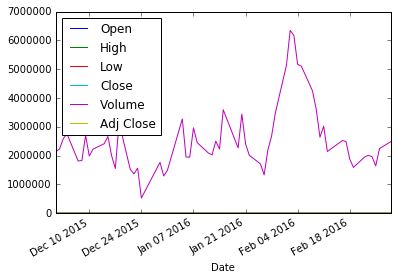

In [42]:
goog['2015-12':'2016-02'].plot()

In [51]:
face['2014']['Close'].mean()

68.7623410912698

In [57]:
face[('2015,05,01'):('2015,08,01')]['Close'].median()

76.584999

In [48]:
face['2016']['Close'].min()

94.450000000000003

In [49]:
face['2016']['Close'].max()

125.0